In [1]:
# some example data
import numpy as np
import pandas
import statsmodels.api as sm

from statsmodels.tsa.api import VAR

mdata = sm.datasets.macrodata.load_pandas().data

# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str

quarterly = dates_from_str(quarterly)

mdata = mdata[['realgdp','realcons','realinv']]

mdata.index = pandas.DatetimeIndex(quarterly)

data = np.log(mdata).diff().dropna()

model = VAR(data)


/Users/junga1/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


<Axes: >

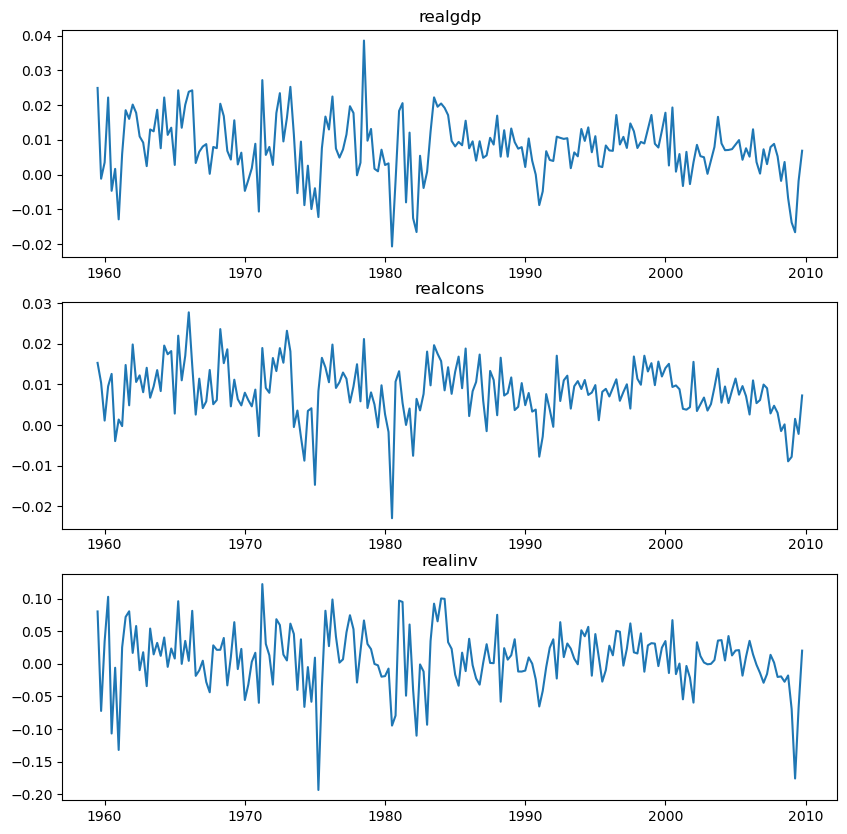

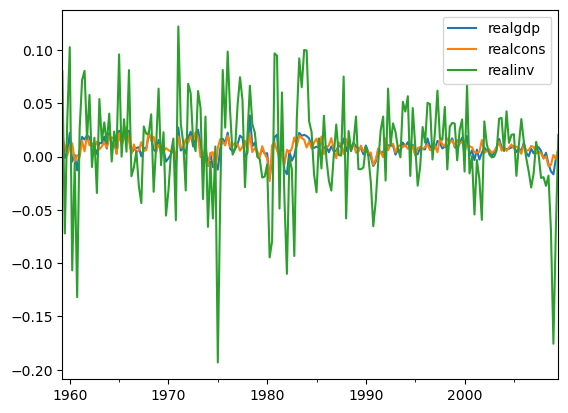

In [3]:
results = model.fit(2)
results.summary()
results.plot()
data.plot()